# Download data from datafed 

In [3]:
# transfer ds to nhi-gpu

import json # For dealing with metadata
import os # For file level operations
from datafed.CommandLib import API
df_api = API()

ls_resp = df_api.collectionItemsList('c/391027993', count=50)
print(ls_resp)

(item {
  id: "d/391002274"
  title: "YG_002-100mTorr_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 1076404480.0
  notes: 0
}
item {
  id: "d/391034672"
  title: "YG_002-100mTorr(down)_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 704002432.0
  notes: 0
}
item {
  id: "d/391036190"
  title: "YG_002-110mTorr_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 704002432.0
  notes: 0
}
item {
  id: "d/391037378"
  title: "YG_002-120mTorr_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 704002432.0
  notes: 0
}
item {
  id: "d/391036825"
  title: "YG_002-120mTorr(down)_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 704002432.0
  notes: 0
}
item {
  id: "d/391037980"
  title: "YG_002-130mTorr_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 704002432

In [4]:
dv_resp = df_api.dataView('d/395020592')
metadata = json.loads(dv_resp[0].data[0].metadata)
print(metadata)

id_index = dv_resp[0].data[0].id
get_resp = df_api.dataGet(id_index, '/scratch/yichen/pld_plumes/', orig_fname=True, wait=True)
get_resp

{'header': {'Base Pressure (Torr)': '1.7e-5', 'Chamber': 'Laser 1C', 'Cool Down Atmosphere': 'Oxygen', 'Date': '04/25/2022', 'Growth ID': 'YG015', 'Path': 'C:\\Image\\', 'Substrate_1': 'SrTiO3', 'User Name': 'Yichen_Guo', 'time': '17:17:31'}, 'target_1': {'Aperture': '12.5', 'Atmosphere Gas': 'Oxygen', 'Attenuator(mm)': '2thin+1thick', 'Focus(mm)': '130', 'Frequency(Hz)': '10', 'Gas Atmosphere': 'Oxygen', 'Laser Energy(mJ)': '100', 'Laser Voltage(kV)': '17.6', 'Measured Energy Mean(mJ)': '100', 'Measured Energy Std(mJ)': '2.57', 'Pressure(mTorr)': '200', 'Pulses': '3500', 'Target Height(mm)': '128.4', 'Target Material': 'SrRuO3', 'Temperature(Â°C)': '700'}}


(task {
   id: "task/395681700"
   type: TT_DATA_GET
   status: TS_SUCCEEDED
   client: "u/yig319"
   step: 2
   steps: 3
   msg: "Finished"
   ct: 1651776099
   ut: 1651776115
   source: "d/395020592"
   dest: "lehigh#nhi-gpu/scratch/yichen/pld_plumes"
 },
 'TaskDataReply')

# Load function

In [1]:
import numpy as np
import sys
sys.path.append('../')
from utils import show_h5_dataset_name
from utils import load_h5_examples
from utils import show_images
from PlumeEvaluation import PlumeMetrics
from PlumeEvaluation import plot_metrics

def process_func(images):
    '''
    An example process function to preprocess images before conducting following steps

    :param images: images to preprocess
    :type images: np.array
    '''

    images = images[np.random.randint(0, images.shape[0])]
    return images

# YG015

In [2]:
ds_path = '/scratch/yichen/pld_plumes/YG015_Yichen_Guo_04252022.h5'
class_name = 'PLD_Plumes'
show_h5_dataset_name(ds_path, class_name)

<KeysViewHDF5 ['0-SrRuO3', '0-SrRuO3_Pre']>


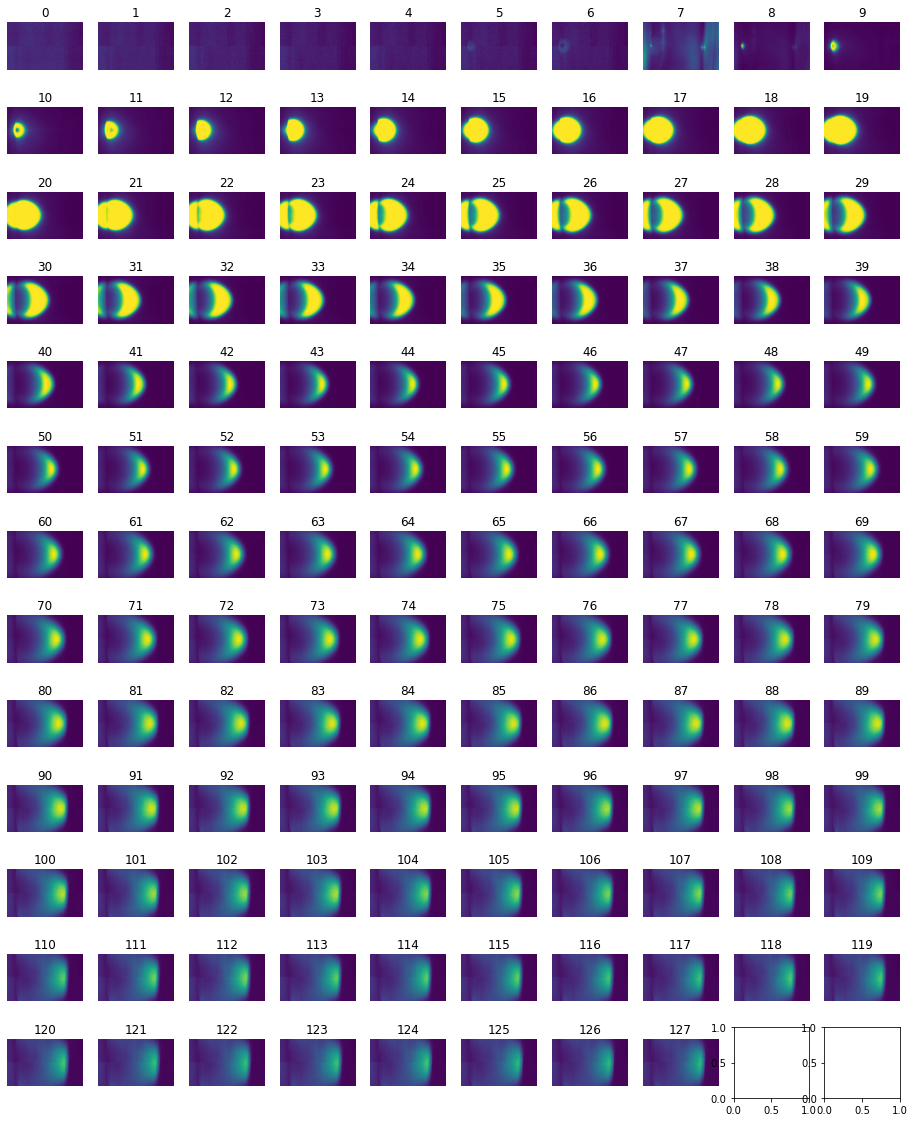

In [3]:
ds_name = '0-SrRuO3'
plumes = load_h5_examples(ds_path, class_name, ds_name, process_func, show=False)
show_images(np.mean(plumes, axis=0), img_per_row=10)

In [ ]:
condition = '100mj-700c-200mtorr-10hz'
m = PlumeMetrics(plumes, condition)

plot_all = m.get_metrics()
df_yg015 = m.to_df(plot_all)
df_yg015.sample(n=5)

In [ ]:
plot_metrics(df_yg015, sort_by='growth_index')

# YG016

In [ ]:
ds_path = '/scratch/yichen/pld_plumes/YG016_Yichen_Guo_04272022'
class_name = 'PLD_Plumes'
show_h5_dataset_name(ds_path, class_name)

In [ ]:
ds_name = '1-SrRuO3'
plumes = load_h5_examples(ds_path, class_name, ds_name, process_func, show=False)
show_images(np.mean(plumes, axis=0), img_per_row=10)

In [ ]:
condition = '100mj-700c-200mtorr-12hz'
m = PlumeMetrics(plumes, condition)

plot_all = m.get_metrics()
df_yg016 = m.to_df(plot_all)
df_yg016.sample(n=5)

In [ ]:
plot_metrics(df_yg016, sort_by='growth_index')

# sort with condition

In [ ]:
df_yg015_yg016 = pd.concat([df_yg015, df_yg016], ignore_index=True)

In [ ]:
plot_metrics(df_yg015_yg016, sort_by='condition')